In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import json
import os


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weather.csv"




In [23]:
#check for csv

if not os.path.isfile(output_data_file):
    
# Range of latitudes and longitudes
    lat_range = (-90, 90)
    lng_range = (-180, 180)


# List for holding lat_lngs and cities
    lat_lngs = []
    cities = []

# Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

# Print the city count to confirm sufficient count
    print (len(cities))
    
# weather check on a city
    def get_weather_json(city, api_key):
    
        url = "http://api.openweathermap.org/data/2.5/weather"
        r = requests.get(url, params={
            "appid": api_key,
            "units": 'imperial',
            "q": city
        })
        if r.status_code == 200:
            r_json = r.json()
            return r_json
        else:
            return None

    in_cities = ["austin", "houston", "trontsrad;", "dallas", "fort worth"]
    out_cities = []
    
    for in_city in cities:
        #don't excede 60 calls per minute for free account
        time.sleep(1.1)
        out_city = get_weather_json(in_city, api_key)
        if out_city:
            out_cities.append(out_city)
        
    pd.DataFrame(out_cities)
    cleaned_out_cities = [{
        "name": d["name"],
        "temp": d["main"]["temp"],
        "humidity": d["main"]["humidity"],
        "cloudiness": d["clouds"]["all"],
        "wind_speed": d["wind"]["speed"],
        "latitude": d["coord"]["lat"]
    } for d in out_cities]
    df = pd.DataFrame(cleaned_out_cities)

    df.to_csv (output_data_file,index=False, header=True)
    



In [24]:
# reading the file
df_r = pd.read_csv(output_data_file)
print(df_r)

           name   temp  humidity  cloudiness  wind_speed  latitude
0      Rosarito  79.05        52          40        8.05      4.91
1       Mataura  52.00        73          87       25.01    -46.19
2      La Ronge   5.00        65          20        8.05     55.10
3          Chuy  75.31        63           0       13.76    -33.69
4      Aripuana  83.14        71          51        2.80     -9.17
..          ...    ...       ...         ...         ...       ...
560    Teguldet  22.41        94         100        7.94     57.31
561       Goure  64.00        27          25        8.99     13.98
562      Norsup  82.38        94          36       12.75    -16.07
563  Molchanovo  15.13        93          72        8.90     57.58
564   Lunenburg  28.72        92         100        1.01     44.38

[565 rows x 6 columns]


<function matplotlib.pyplot.show(*args, **kw)>

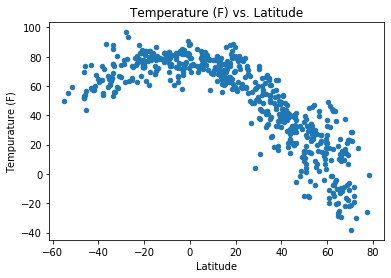

In [25]:
# Temperature (F) vs. Latitude
df_r.plot.scatter(['latitude'],['temp'])
plt.title ("Temperature (F) vs. Latitude")
plt.ylabel("Tempurature (F)")
plt.xlabel("Latitude")
plt.show


    

<function matplotlib.pyplot.show(*args, **kw)>

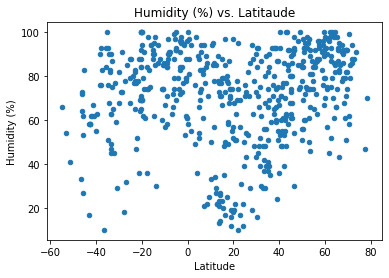

In [26]:
# Humididity (%) vs. Latitude
df_r.plot.scatter(['latitude'],['humidity'])
plt.title ("Humidity (%) vs. Latitaude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

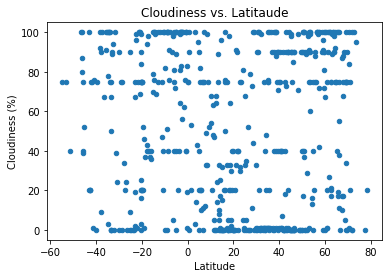

In [27]:
#Cloudiness (%) vs. Latitude

df_r.plot.scatter(['latitude'],['cloudiness'])
plt.title ("Cloudiness vs. Latitaude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

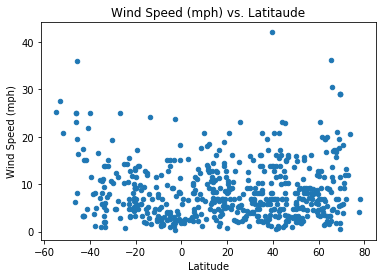

In [28]:
# Wind Speed (mph) vs. Latitude
df_r.plot.scatter(['latitude'],['wind_speed'])
plt.title ("Wind Speed (mph) vs. Latitaude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show